# Categorical Analysis using SAS code

In [56]:
import sys
try:
    import saspy
except:
    !pip install saspy

In [57]:
# check the version of SASPy
saspy.__version__

'5.4.4'

In [58]:
# Start a SAS session, SAS is running in UTF-8

sas_sess = saspy.SASsession()

Using SAS Config named: oda
SAS Connection established. Subprocess id is 20448



    For this dataset, there are 2,401 rows and 15 columns

        Data Dictionary: https://www.kaggle.com/datasets/antimoni/metabolic-syndrome
            seqn: Sequential identification number.
            Age: Age of the individual.
            Sex: Gender of the individual (e.g., Male, Female).
            Marital: Marital status of the individual.
            Income: Income level or income-related information.
            Race: Ethnic or racial background of the individual.
            WaistCirc: Waist circumference measurement.
            BMI: Body Mass Index, a measure of body composition.
            Albuminuria: Measurement related to albumin in urine.
            UrAlbCr: Urinary albumin-to-creatinine ratio.
            UricAcid: Uric acid levels in the blood.
            BloodGlucose: Blood glucose levels, an indicator of diabetes risk.
            HDL: High-Density Lipoprotein cholesterol levels (the "good" cholesterol).
            Triglycerides: Triglyceride levels in the blood.
            MetabolicSyndrome: Binary variable indicating the presence (1) or absence (0) of metabolic syndrome.

In [59]:
%%SAS sas_sess

FILENAME REFFILE '/home/u61624884/Metabolic Syndrome.csv';
   
PROC IMPORT DATAFILE=REFFILE
    DBMS=CSV
    OUT=WORK.IMPORT;
    GETNAMES=YES;
RUN;


/* print first 10 observations */
proc print data=WORK.IMPORT (obs=10);
run;

/* Checking the contents of the datasets */
proc means data=WORK.IMPORT N Nmiss mean median max min;
run;


/*count missing for each character variable*/
proc sql; 
    select nmiss(sex) as sex_miss, nmiss(marital) as marital_miss, nmiss(race) as race_miss, nmiss(MetabolicSyndrome) as MetabolicSyndrome_miss
    from WORK.IMPORT; 
quit;

/* COUNT THE NUMBER OF MISSING VALUES FOR marital*/
proc format;
 value $miss " "="missing"
 other="nomissing";
run;

proc freq data=WORK.IMPORT;
  tables marital / missing;
  format marital $miss.;
run; 

Obs,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
1,62161,22,Male,Single,8200,White,81,23.3,0,3.88,4.9,92,41,84,No MetSyn
2,62164,44,Female,Married,4500,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
3,62169,21,Male,Single,800,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
4,62172,43,Female,Single,2000,Black,120.4,33.3,0,5.22,5,104,73,141,No MetSyn
5,62177,51,Male,Married,.,Asian,81.1,20.1,0,8.13,5,95,43,126,No MetSyn
6,62178,80,Male,Widowed,300,White,112.5,28.5,0,9.79,4.8,105,47,100,No MetSyn
7,62184,26,Male,Single,9000,Black,78.6,22.1,0,9.21,5.4,87,61,40,No MetSyn
8,62189,30,Female,Married,6200,Asian,80.2,22.4,0,8.78,6.7,83,48,91,No MetSyn
9,62191,70,Male,Divorced,1000,Black,.,.,1,45.67,5.4,96,35,75,No MetSyn
10,62195,35,Male,,2500,Black,99,28.2,0,2.21,6.7,94,46,86,No MetSyn


In [60]:
%%SAS sas_sess


proc freq data=WORK.IMPORT nlevels;
    title 'Frequency tables for categorical variables';
    tables MetabolicSyndrome; tables Sex; tables Race; tables Marital; 
run;

title;

### Exploring Data by Histogram


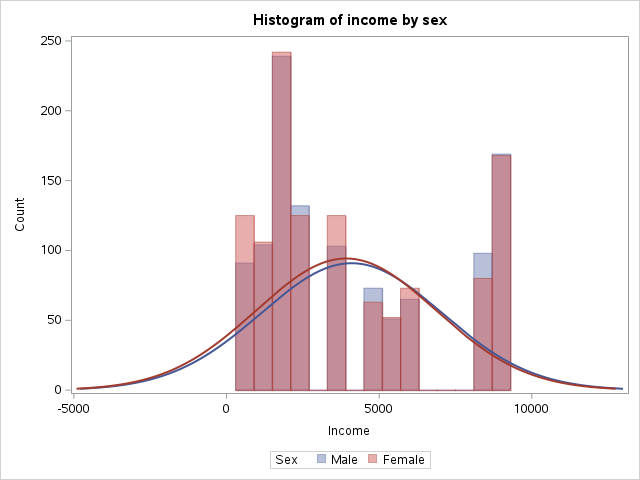
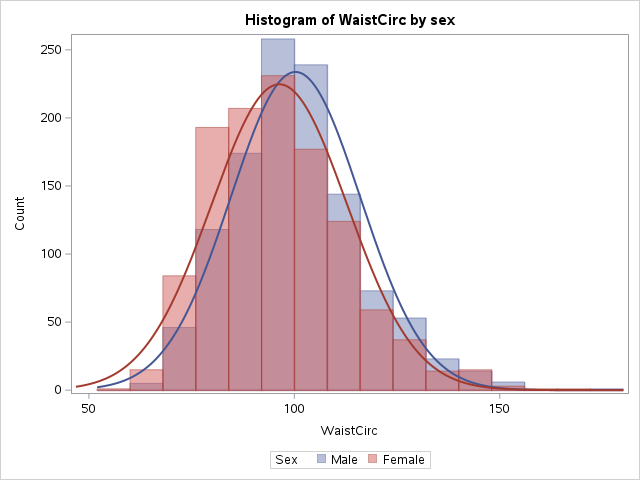
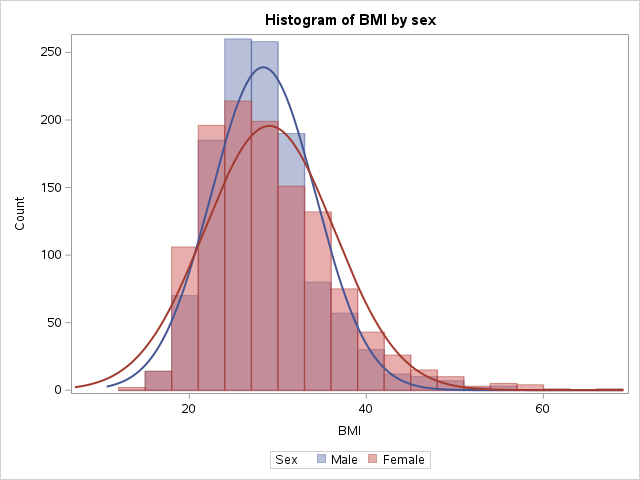
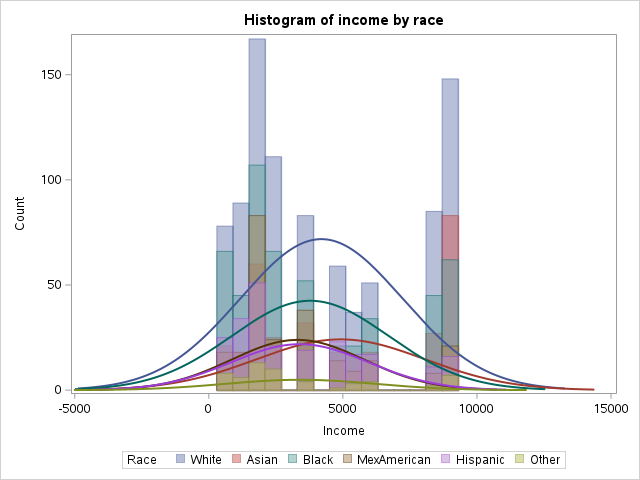
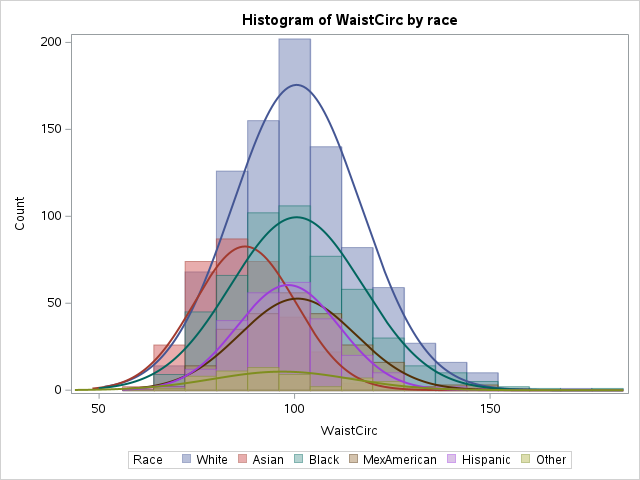
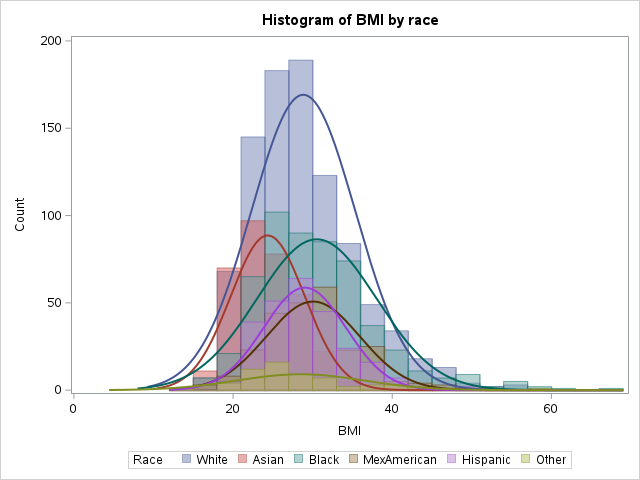

In [61]:
%%SAS sas_sess

proc sgplot data=WORK.IMPORT;
    title "Histogram of income by sex";
    histogram income / group=sex transparency=0.5 scale=count;
    density income / type=normal group=sex;
RUN;
title;
proc sgplot data=WORK.IMPORT;
    title "Histogram of WaistCirc by sex";
    histogram WaistCirc / group=sex transparency=0.5 scale=count;
    density WaistCirc / type=normal group=sex;
RUN;
title;
proc sgplot data=WORK.IMPORT;
title "Histogram of BMI by sex";
    histogram BMI / group=sex transparency=0.5 scale=count;
    density BMI / type=normal group=sex;
RUN;
title;


proc sgplot data=WORK.IMPORT;
    title "Histogram of income by race";
    histogram income / group=race transparency=0.5 scale=count;
    density income / type=normal group=race;
RUN;
title;
proc sgplot data=WORK.IMPORT;
    title "Histogram of WaistCirc by race";
    histogram WaistCirc / group=race transparency=0.5 scale=count;
    density WaistCirc / type=normal group=race;
RUN;
title;
proc sgplot data=WORK.IMPORT;
title "Histogram of BMI by race";
    histogram BMI / group=race transparency=0.5 scale=count;
    density BMI / type=normal group=race;
RUN;
title;


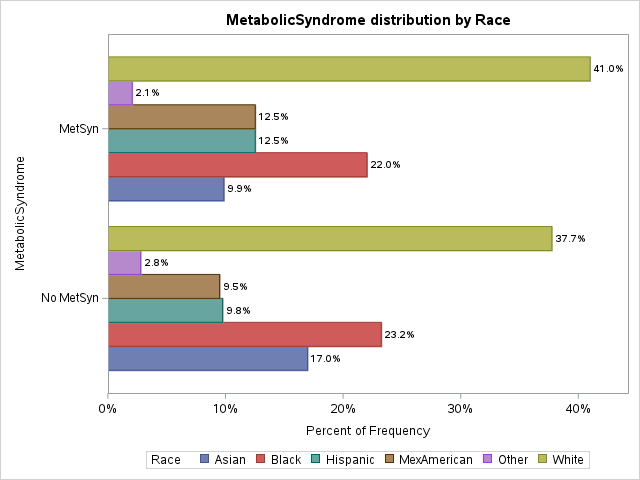
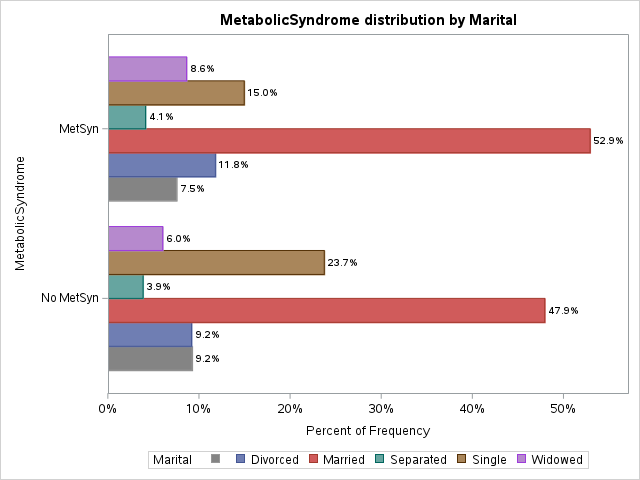

In [62]:
%%SAS sas_sess

proc sgplot data=WORK.IMPORT pctlevel=group;
    title 'MetabolicSyndrome distribution by Race';
  hbar MetabolicSyndrome / stat=percent group=race groupdisplay=cluster datalabel missing;
run;
title;

proc sgplot data=WORK.IMPORT pctlevel=group;
    title 'MetabolicSyndrome distribution by Marital';
  hbar MetabolicSyndrome / stat=percent group=Marital groupdisplay=cluster datalabel missing;
run;
title;


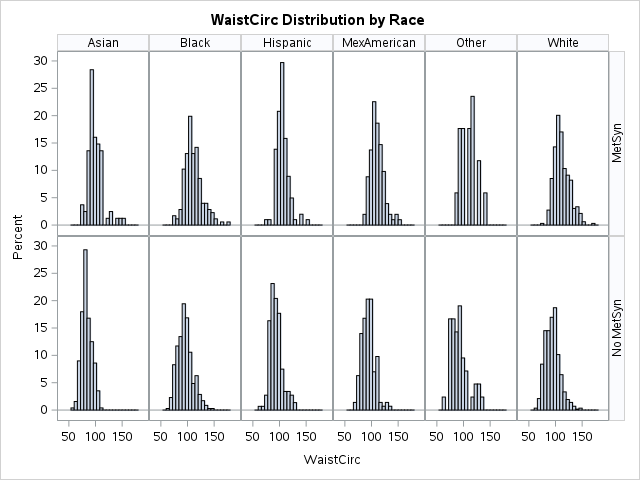
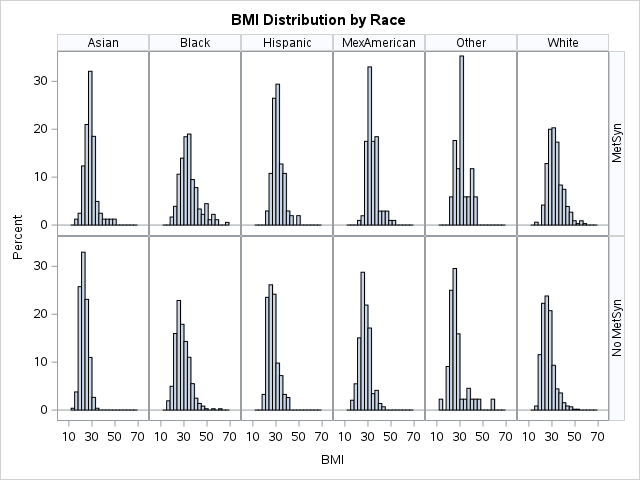
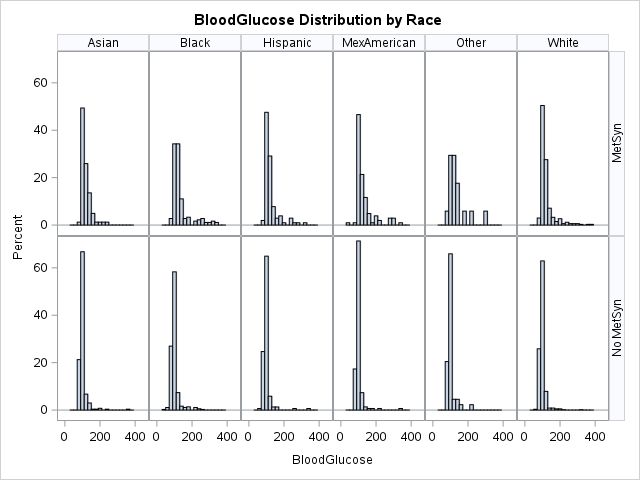
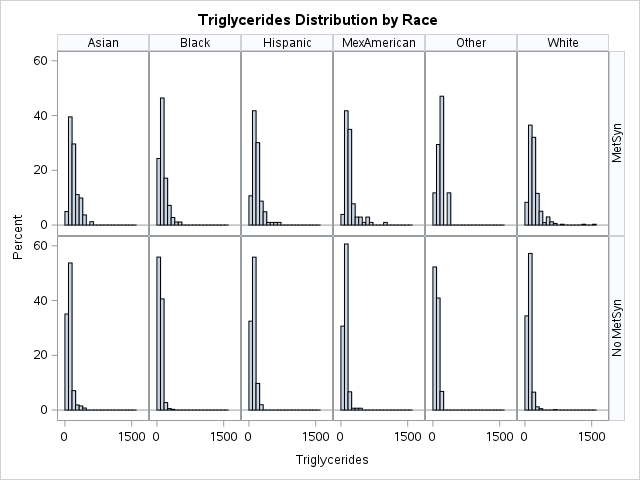

In [63]:
%%SAS sas_sess

proc sgpanel data=WORK.IMPORT;
    title "WaistCirc Distribution by Race";
  panelby  race MetabolicSyndrome/ layout=lattice novarname columns=6;
  histogram WaistCirc;
run;
title;
proc sgpanel data=WORK.IMPORT;
    title "BMI Distribution by Race";
  panelby  race MetabolicSyndrome/ layout=lattice novarname columns=6;
  histogram BMI;
run;
title;
proc sgpanel data=WORK.IMPORT;
    title "BloodGlucose Distribution by Race";
  panelby  race MetabolicSyndrome/ layout=lattice novarname columns=6;
  histogram BloodGlucose; 
run;
title;
proc sgpanel data=WORK.IMPORT;
    title "Triglycerides Distribution by Race";
  panelby  race MetabolicSyndrome/ layout=lattice novarname columns=6;
  histogram Triglycerides; 
run;
title;


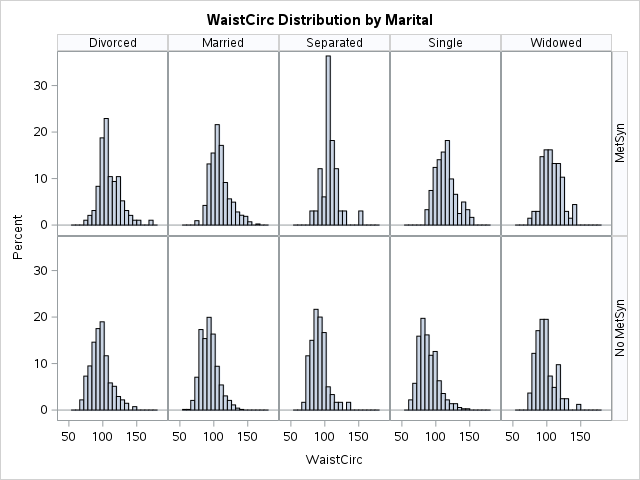
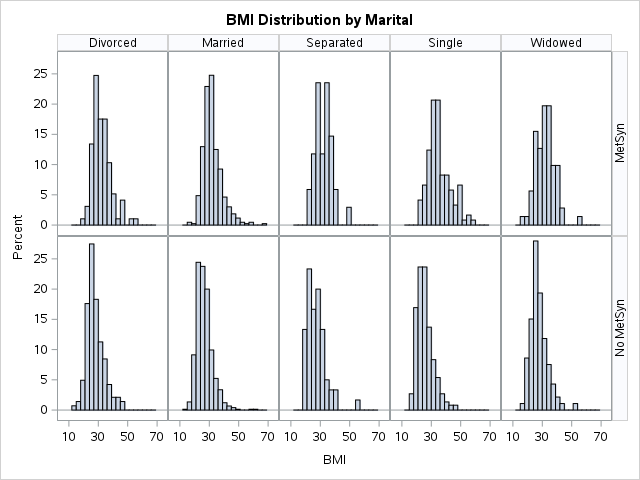
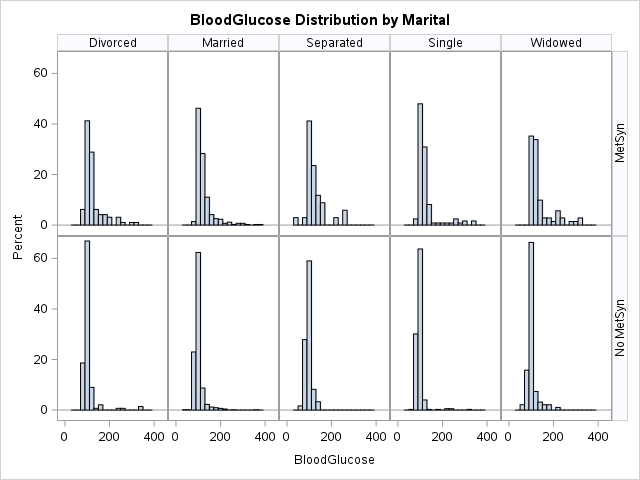
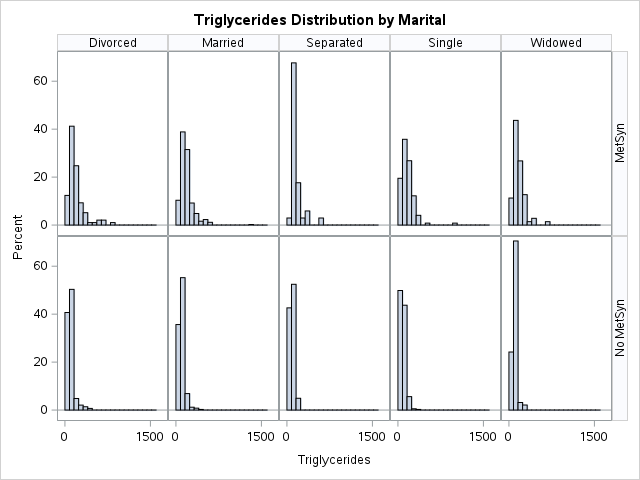

In [64]:
%%SAS sas_sess

proc sgpanel data=WORK.IMPORT;
    title "WaistCirc Distribution by Marital";
  panelby  Marital MetabolicSyndrome/ layout=lattice novarname columns=6;
  histogram WaistCirc;
run;
title;
proc sgpanel data=WORK.IMPORT;
    title "BMI Distribution by Marital";
  panelby  Marital MetabolicSyndrome/ layout=lattice novarname columns=6;
  histogram BMI;
run;
title;
proc sgpanel data=WORK.IMPORT;
    title "BloodGlucose Distribution by Marital";
  panelby  Marital MetabolicSyndrome/ layout=lattice novarname columns=6;
  histogram BloodGlucose; 
run;
title;
proc sgpanel data=WORK.IMPORT;
    title "Triglycerides Distribution by Marital";
  panelby  Marital MetabolicSyndrome/ layout=lattice novarname columns=6;
  histogram Triglycerides; 
run;
title;


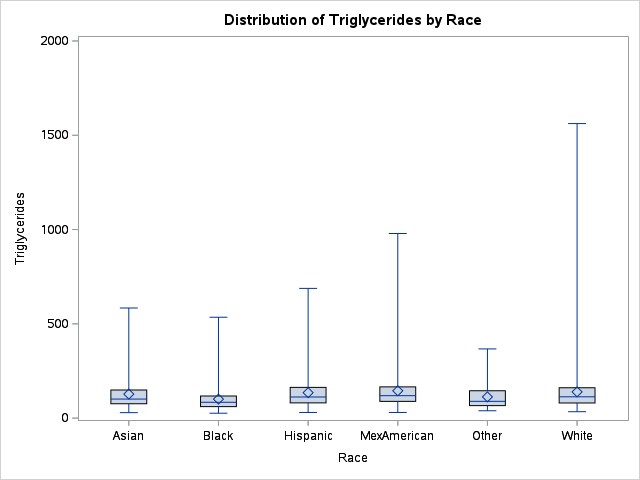
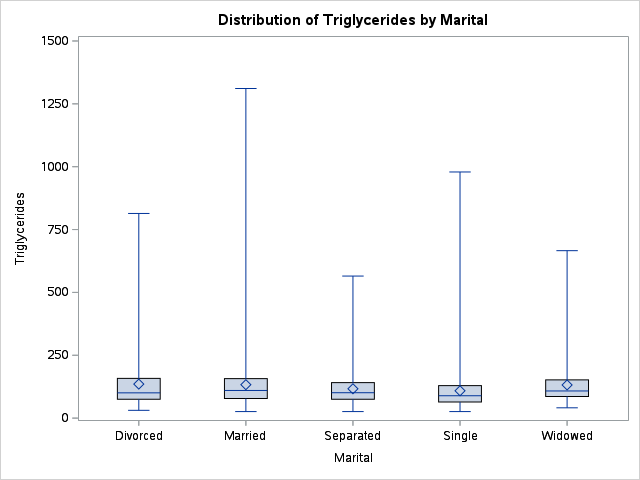

In [65]:
%%SAS sas_sess

/* Sorting out the Race and income for creating boxplot */
proc sort data=WORK.IMPORT out=sorted;
    by Race Triglycerides;
run;

proc boxplot data=sorted;
    plot Triglycerides*Race;
    title 'Box Plot for Triglycerides vs Race';
run;
title;

proc sort data=WORK.IMPORT out=sorted2;
    by Marital Triglycerides;
run;

proc boxplot data=sorted2;
    plot Triglycerides*Marital;
    title 'Box Plot for Triglycerides vs Marital';
run;
title;

### Imputation techniques that use observed values from the sample to impute (fill in) missing values are known as hot-deck imputation. Hot-Deck that requests donor selection by using the approximate Bayesian bootstrap method. 

http://www.misug.org/uploads/8/1/9/1/8191072/mrush_missing_data.pdf

In [66]:
%%SAS sas_sess

/* 

By default, SELECTION=SRSWR for METHOD=HOTDECK if you do not use the WEIGHT statement
SRSWR - requests donor selection by using simple random samples with replacement.
The SEED= option specifies the seed for random number generation
NDONORS= option specifies the number of donor units to select for every recipient unit.
By default, NDONORS=1 for METHOD=HOTDECK. If you specify NDONORS=0 for METHOD=HOTDECK, then no imputation is performed.

*/

proc surveyimpute data=WORK.IMPORT 
        method=hotdeck(selection=srswor);                      
    var income WaistCirc BMI marital;      /* specifies the variables that contain the missing values */
    id seqn;                               /* The ID statement names the variable that contains the observation IDs. */    
    output out = data_imputed 
        donorid;                           /* requests a name for the identification variable for the donor units */
run;

In [67]:
%%SAS sas_sess

/* check data after imputed*/

proc means data=data_imputed N Nmiss mean median std;
run;

Variable,Label,N,N Miss,Mean,Median,Std Dev
ImpIndex DonorID seqn Age Income WaistCirc BMI Albuminuria UrAlbCr UricAcid BloodGlucose HDL Triglycerides,Imputation Index Donor ID,2401 392 2401 2401 2401 2401 2401 2401 2401 2401 2401 2401 2401,0 2009 0 0 0 0 0 0 0 0 0 0 0,0.1632653 67046.39 67030.67 48.6917951 4023.62 98.3993753 28.6928780 0.1541025 43.6261308 5.4890462 108.2478134 53.3694294 128.1253644,0 67199.00 67059.00 48.0000000 2500.00 97.0000000 27.7000000 0 7.0700000 5.4000000 99.0000000 51.0000000 103.0000000,0.3696846 2829.23 2823.57 17.6328520 2962.23 16.2138414 6.6479649 0.4227795 258.2728289 1.4393578 34.8206569 15.1855375 95.3224774



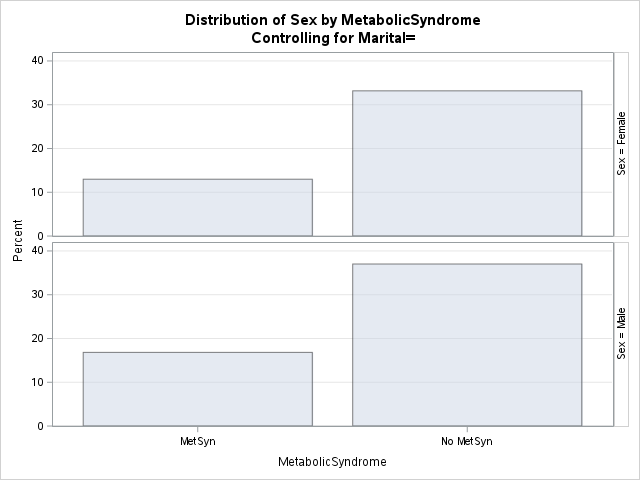
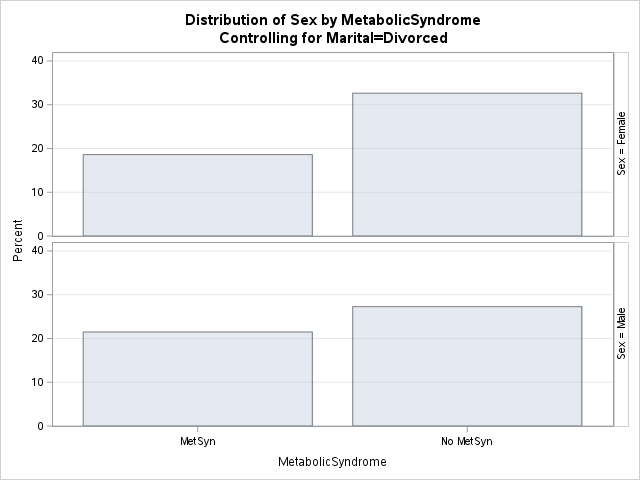
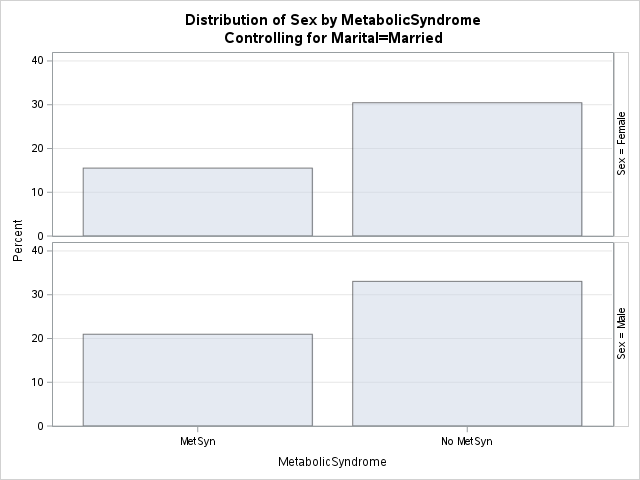
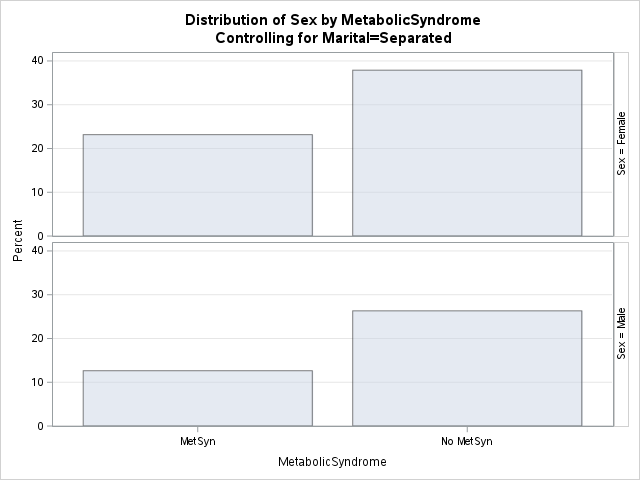
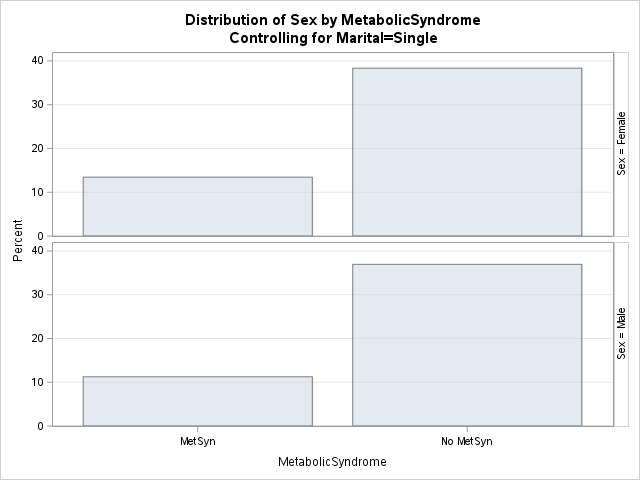
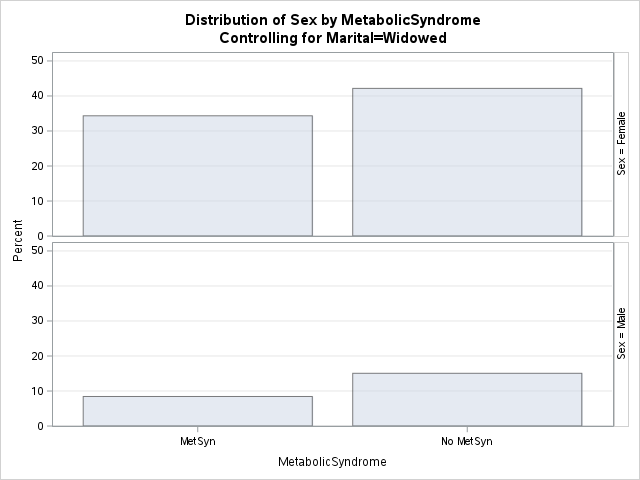
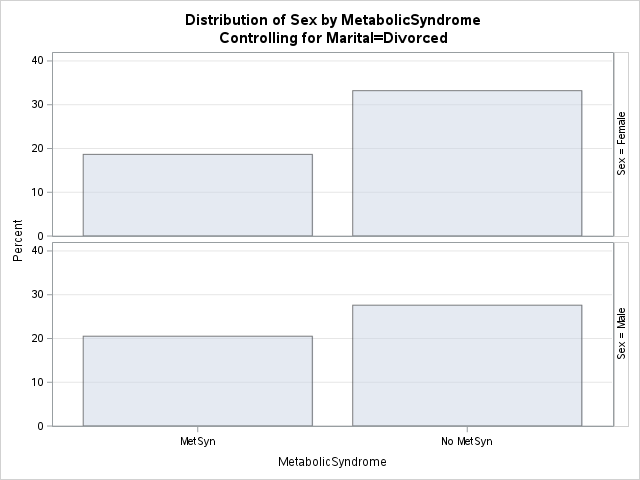
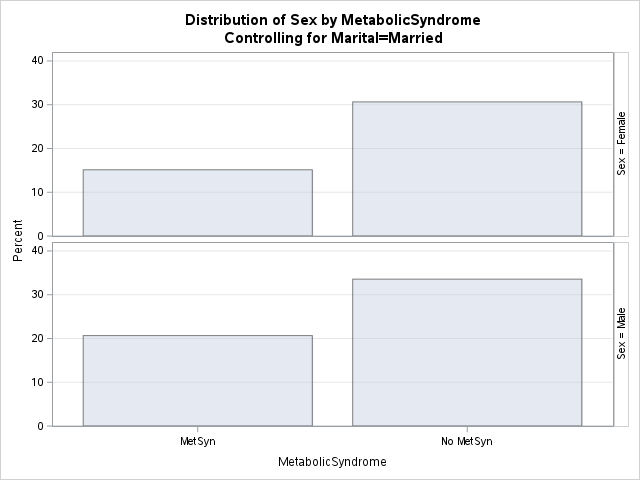
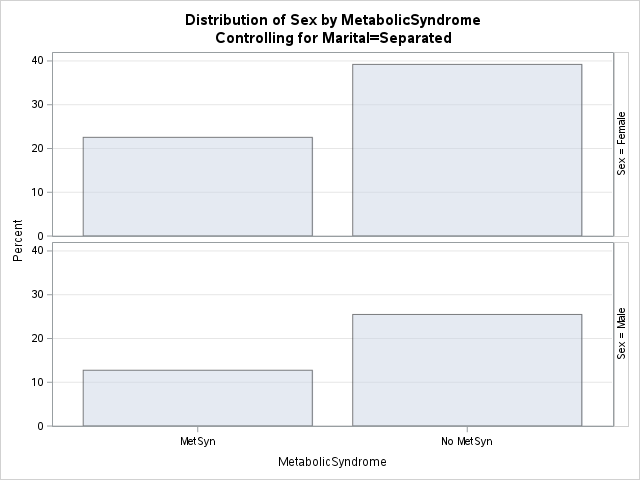
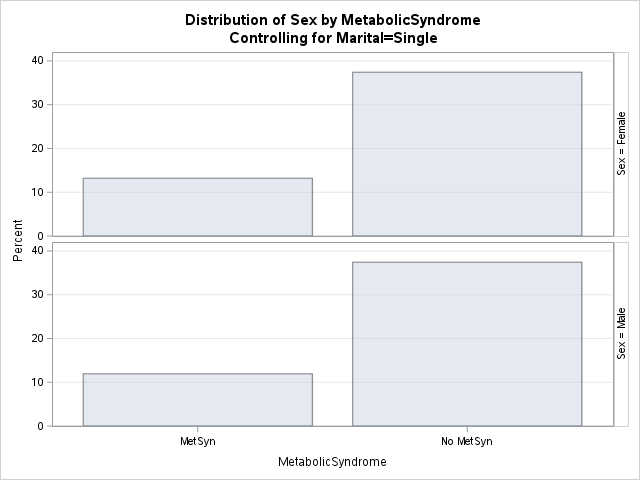
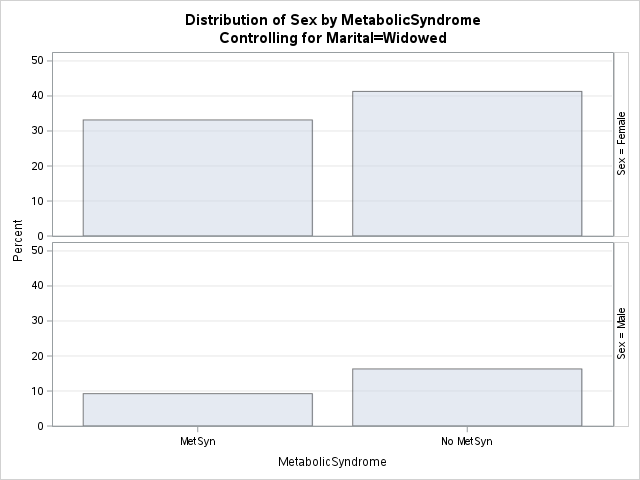
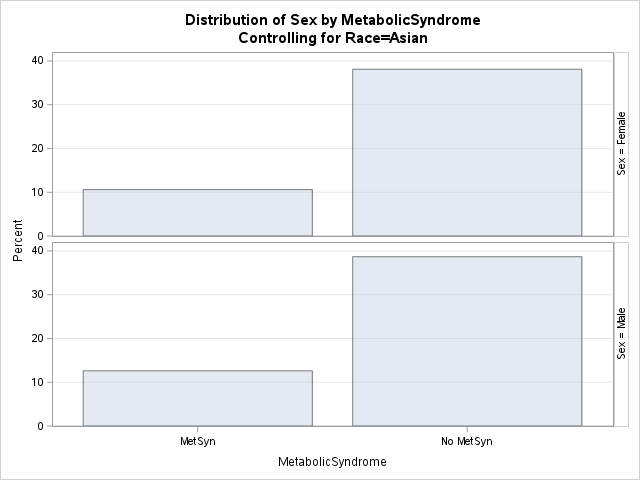
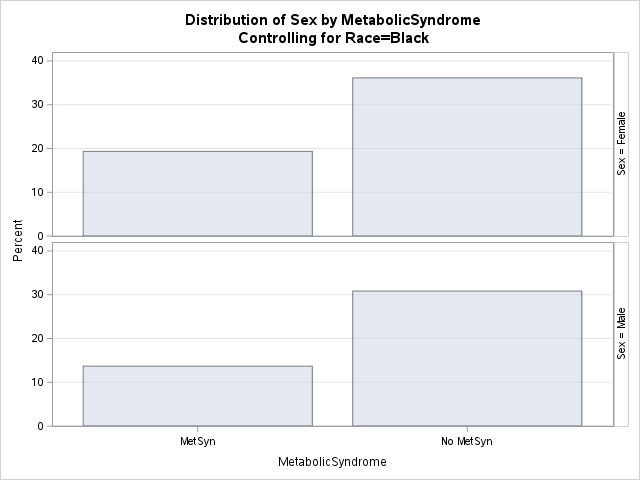
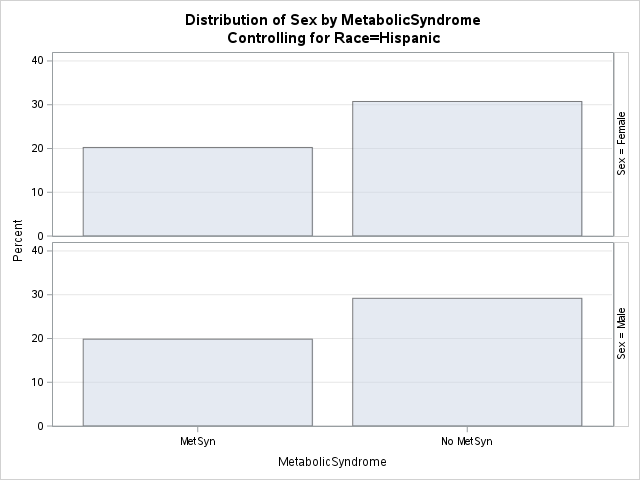
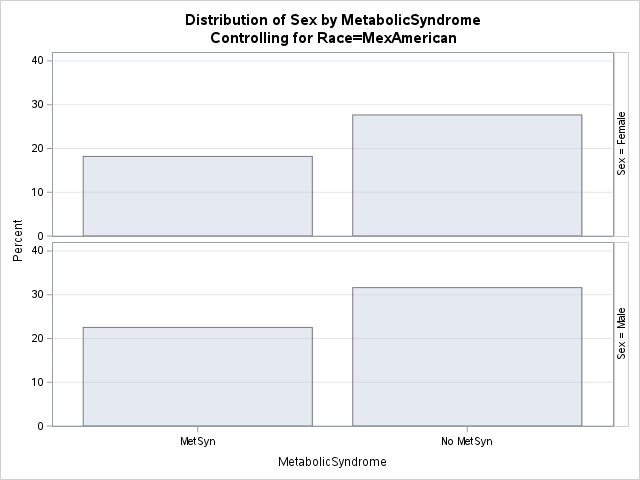
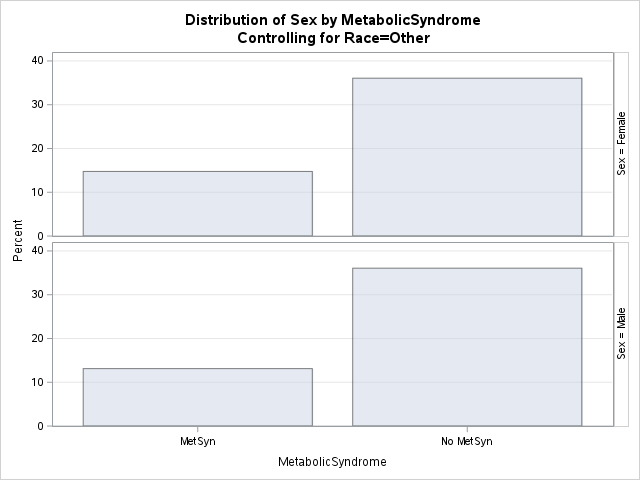
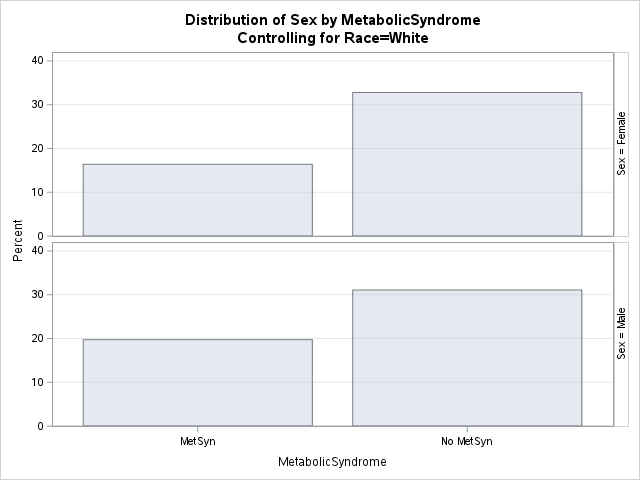
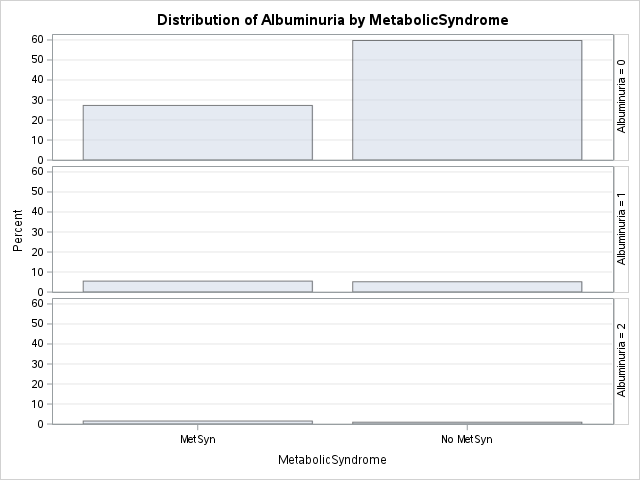

In [68]:
%%SAS sas_sess


/*Show overall proportions only - suppress row and column proportions*/

PROC FREQ DATA=WORK.IMPORT;
    TABLE Marital*sex*MetabolicSyndrome / NOROW NOCOL MISSPRINT plots=(freqplot(twoway=groupvertical
scale=percent));
    title 'Before missing data are imputed';
RUN;
title;

PROC FREQ DATA=data_imputed;
    TABLE Marital*sex*MetabolicSyndrome / NOROW NOCOL plots=(freqplot(twoway=groupvertical
scale=percent));
    title 'After missing data are imputed';
RUN;


PROC FREQ DATA=data_imputed;
    TABLE race*sex*MetabolicSyndrome / NOROW NOCOL plots=(freqplot(twoway=groupvertical
scale=percent));
RUN;
title;

PROC FREQ DATA=data_imputed;
    TABLE Albuminuria*MetabolicSyndrome / NOROW NOCOL plots=(freqplot(twoway=groupvertical
scale=percent));
RUN;
title;

#### The percentage are almost the same amoug marital before and after data are imputed. High percentage (32.02%) has Metabolic Syndrome on widowed female and low percentage on widowed male. Overall low percentage Metabolic Syndrome (25.41%) for marital=single on both sex.  Overall low percentage Metabolic Syndrome for race = asian or other.

### Inferential Statistics for Categorical Variables
#### Two Way Chi-Square -  Chi-square test of independence

In [69]:
%%SAS sas_sess


/*  the chi-square test assumes that each cell has an expected frequency of five or more, 
   otherwise use Fisher’s exact test if one or more of your cells has an expected frequency of less than five. 
*/

proc freq data=data_imputed;
    tables Marital*MetabolicSyndrome / chisq expected;
    title 'Chi-Square Test of Association of Marital and MetabolicSyndrome';
run;
title;

proc freq data=data_imputed;
    tables sex*MetabolicSyndrome / chisq expected;
    title 'Chi-Square Test of Association of sex and MetabolicSyndrome';
run;
title;

proc freq data=data_imputed;
    tables race*MetabolicSyndrome / chisq expected;
    title 'Chi-Square Test of Association of race and MetabolicSyndrome';
run;
title;

proc freq data=data_imputed;
    tables albuminuria*MetabolicSyndrome / chisq expected;
    title 'Chi-Square Test of Association of albuminuria and MetabolicSyndrome';
run;
title;

#### These results indicate that there is no statistically significant relationship between the sex and MetabolicSyndrome (chi-square with one degree of freedom = 0.9948, p = 0.3186). The proportion of males and female has Metabolic Syndrome is not significally different than the proportion of males and female has no Metabolic Syndrome.But it has statistically significant relationship between the marital and MetabolicSyndrome, and between race and MetabolicSyndrome and between albuminuria and MetabolicSyndrome.

### Computing Correlations

In [70]:
%%SAS sas_sess

proc corr data=data_imputed pearson;
   with albuminuria;
   var  Age Income WaistCirc BMI UrAlbCr UricAcid BloodGlucose HDL Triglycerides;
run;

#### Albuminuria is Correlated with Age,	Income,	WaistCirc,	UrAlbCr,	UricAcid,	BloodGlucose,	and	Triglycerides

### Logistic regression

In [71]:
%%SAS sas_sess

proc logistic data=data_imputed;
  model MetabolicSyndrome = Age Income WaistCirc BMI UrAlbCr UricAcid BloodGlucose HDL albuminuria Triglycerides;
run;

### Data Partition
 
#### Splitting the dataset into training and validation by using the 70:30 ratio. First, I need to sort out the data using proc sort and splitting by using proc surveyselect.

In [72]:
%%SAS sas_sess

/* Splitting the dataset into traning and validation using 80:20 ratio */
proc sort data = data_imputed out = train_sorted;
    by MetabolicSyndrome;
    run;
proc surveyselect data = train_sorted out = train_survey outall
    samprate = 0.8 seed = 12345;
    strata MetabolicSyndrome;
run;

/* Generating frequency table - verify the correct data partition*/
proc freq data = train_survey;  /* Resultant table  will have column “selected” with values 1 and 0*/
    tables Selected*MetabolicSyndrome;
run;


In [73]:
%%SAS sas_sess

/* Split all the 1s as Train data set and all 0s as Test data set */
data data_train data_test; 
    set train_survey; 
    if selected =1 then output data_train; 
    else output data_test; 
run;


### Building Model


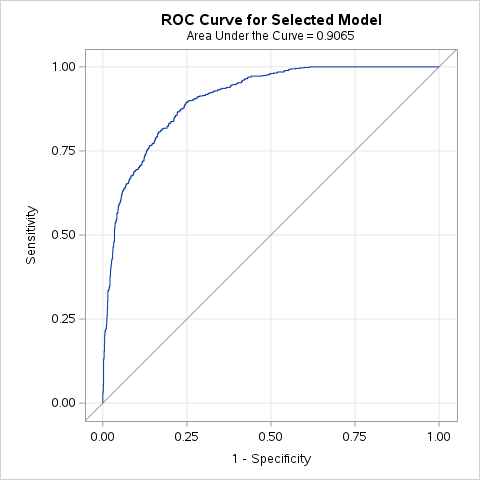
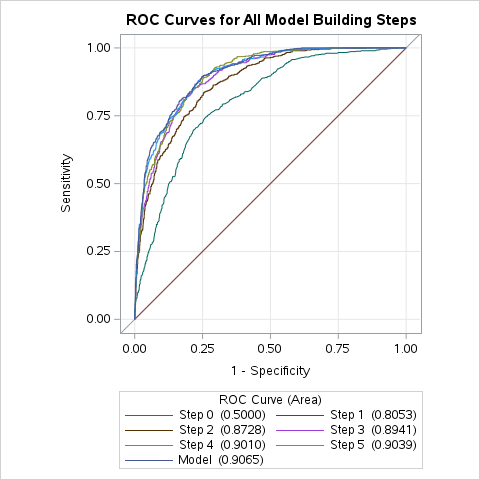
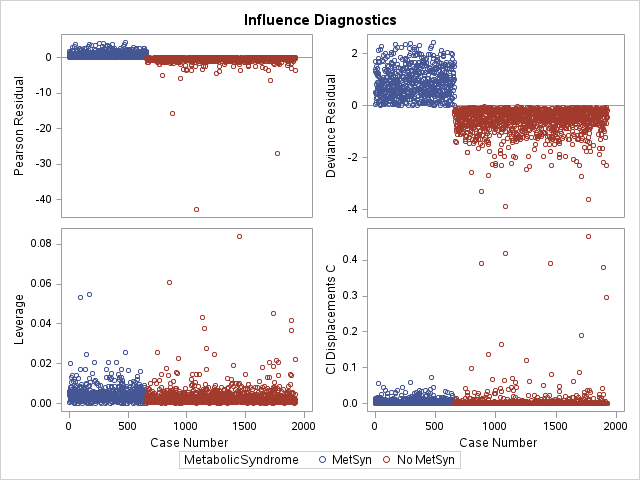
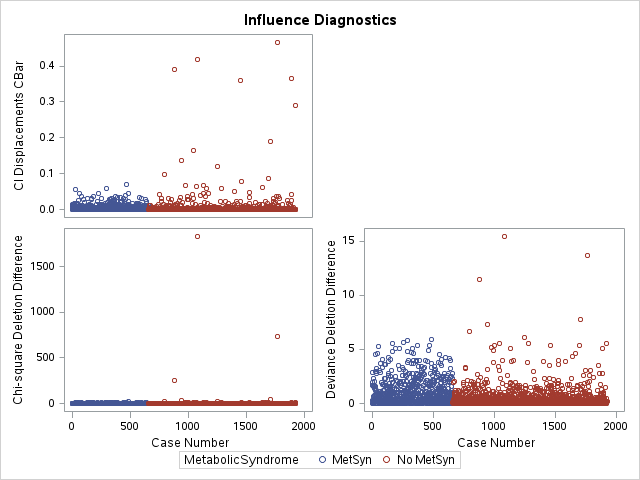
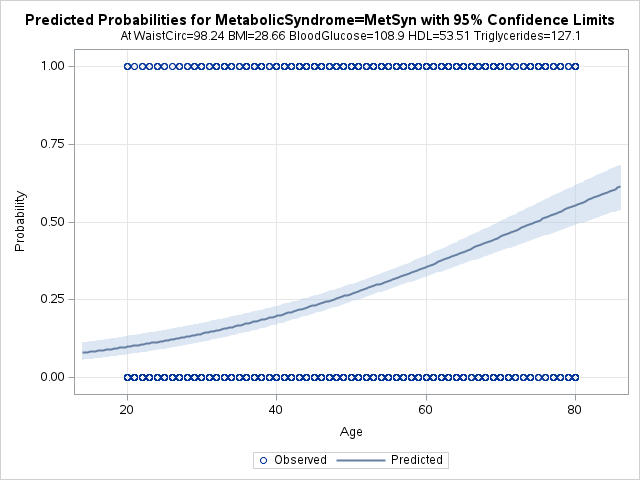

In [74]:
%%SAS sas_sess

/* Creating Logistic regression model */
proc logistic data=data_train plots=EFFECT plots=roc;
    class Sex marital race /param=ref;
    model MetabolicSyndrome = Age Income WaistCirc BMI UrAlbCr UricAcid BloodGlucose HDL Albuminuria Triglycerides /
        selection=stepwise expb stb lackfit;
    score data=data_test out=logistic_output;
run;

### If we can see the Concordant pairs, it is 90.6 %. Concordance is used to assess how well scorecards are separating the good and bad accounts in the development sample. The higher is the concordance, the larger is the separation of scores between good and bad accounts. 

#### The Hosmer–Lemeshow test : Small p-values ( Pr > ChiSq) mean that the model is a poor fit. Like most goodness of fit tests, these small p-values (usually under 5%) mean that your model is not a good fit.

    Reference:
        - https://sasnrd.com/sas-histogram-example/
        - https://www.statology.org/sas-count-missing-values/
        - https://www.statology.org/sas-proc-sgpanel/
        - https://stats.oarc.ucla.edu/other/mult-pkg/faq/how-can-i-count-the-number-of-missing-values-for-a-charactervariable/
        - https://data-flair.training/blogs/sas-missing-data-analysis/
        - https://www.datascienceblog.net/post/statistical_test/contingency_table_tests/
        - https://www.tutorialspoint.com/sas/sas_hypothesis_testing.htm
        - https://communities.sas.com/t5/SAS-Communities-Library/A-Guide-to-Logistic-Regression-in-SAS/ta-p/564323
        - https://stats.oarc.ucla.edu/sas/output/proc-logistic/
        - https://www.datasciencemadesimple.com/proc-surveyselect-in-sas-explained/
        - https://www.listendata.com/2023/08/sas-split-data-into-training-and-test.html